In [401]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap
import osmnx as ox
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Counter Points Data Analysis

In [347]:
cp_df=pd.read_csv('data/count_points.csv')
cp_df['capacity']=cp_df['road_type'].apply(lambda x: 1500 if x=='Major' else 800)
cp_df


,count_point_id,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,capacity
0,998097,6,London,108,Wandsworth,C,Minor,NaN,NaN,525020,173960,51.450833,-0.202202,NaN,NaN,800
1,998071,6,London,108,Wandsworth,U,Minor,NaN,NaN,523303,174410,51.455254,-0.226743,NaN,NaN,800
2,998065,6,London,108,Wandsworth,B237,Minor,NaN,NaN,528100,173968,51.450217,-0.157899,NaN,NaN,800
3,990355,6,London,108,Wandsworth,C,Minor,NaN,NaN,526080,174220,51.452935,-0.186863,NaN,NaN,800
4,953192,6,London,108,Wandsworth,U,Minor,NaN,NaN,528346,175841,51.466994,-0.153682,NaN,NaN,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,7571,6,London,108,Wandsworth,A3036,Major,A3220,LA Boundary,528000,175600,51.464905,-0.158747,0.8,0.50,1500
118,6774,6,London,108,Wandsworth,A217,Major,A24,A3,526600,172000,51.432866,-0.180177,4.2,2.61,1500
119,6757,6,London,108,Wandsworth,A205,Major,A219,A3,524500,174850,51.458945,-0.209369,1.1,0.68,1500
120,6111,6,London,108,Wandsworth,A3,Major,A205,A218,525000,174600,51.456588,-0.202264,0.4,0.25,1500


In [348]:
len(cp_df['count_point_id'].unique()) # Total number of counter points

122

In [349]:

cp_df.isna().any()

count_point_id              False
region_id                   False
region_name                 False
local_authority_id          False
local_authority_name        False
road_name                   False
road_type                   False
start_junction_road_name     True
end_junction_road_name       True
easting                     False
northing                    False
latitude                    False
longitude                   False
link_length_km               True
link_length_miles            True
capacity                    False
dtype: bool

In [350]:
df_missing =cp_df[cp_df['link_length_km'].isna()]

## Data Engineering: Getting the missing values of links length using OSM

In [351]:
# df_missing['geometry'] = df_missing.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
# gdf_missing = gpd.GeoDataFrame(df_missing, geometry='geometry')
# north, south, east, west = cp_df['latitude'].max(), cp_df['latitude'].min(), cp_df['longitude'].max(), cp_df['longitude'].min()
# G = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# # Step 4: Find the nearest road segment for each missing counter and calculate its length
# for idx, row in gdf_missing.iterrows():
#     point = (row['latitude'], row['longitude'])
    
#     # Get the nearest edge (road segment) to the point
#     nearest_edge = ox.distance.nearest_edges(G, row['longitude'], row['latitude'])
    
#     # Get the length of the nearest road segment
#     u, v, key = nearest_edge
#     edge_data = G.get_edge_data(u, v, key)
#     length_in_km = edge_data['length'] / 1000  # length is in meters by default
    
#     gdf_missing.loc[idx,'link_length_km']=length_in_km




In [352]:
# gdf_missing

In [353]:

# map_center=[gdf_missing ['latitude'].mean(),gdf_missing ['longitude'].mean()]
# m=folium.Map(location=map_center,zoom_start=12)

# for ind,row in gdf_missing .iterrows():
#     link_len=row['link_length_km']
#     folium.Marker(
#         [row['latitude'],row['longitude']],
#         popup=f'{link_len}'
#         ).add_to(m)
    
# m

In [354]:
#cp_df.loc[gdf_missing.index,'link_length_km']=gdf_missing['link_length_km'] # Filling missing link_length_km values in primary counter point df.

In [355]:
#cp_df.isna().any()

# Reading Raw Count Data

In [356]:
df=pd.read_csv('data/dft_rawcount_local_authority_id_108.csv',parse_dates=['count_date'])
df['geometry']=df.apply(lambda row: Point(row['longitude'],row['latitude']),axis=1)
df['month']=df['count_date'].dt.month
df.head()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,geometry,month
0,6109,E,2002,2002-04-15,7,6,London,108,Wandsworth,A3,...,20,4,1,1,2,0,28,653,POINT (-0.15313728 51.46122126),4
1,6109,E,2002,2002-04-15,8,6,London,108,Wandsworth,A3,...,29,2,1,0,1,0,33,659,POINT (-0.15313728 51.46122126),4
2,6109,E,2002,2002-04-15,9,6,London,108,Wandsworth,A3,...,42,3,5,1,4,0,55,582,POINT (-0.15313728 51.46122126),4
3,6109,E,2002,2002-04-15,10,6,London,108,Wandsworth,A3,...,47,8,0,0,2,6,63,583,POINT (-0.15313728 51.46122126),4
4,6109,E,2002,2002-04-15,11,6,London,108,Wandsworth,A3,...,56,4,0,0,4,0,64,692,POINT (-0.15313728 51.46122126),4


In [357]:
df.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles', 'geometry',
       'month'],
      dtype='object')

In [358]:
major_rd_df=df[df['road_type']=='Major'].copy()
minor_rd_df=df[df['road_type']=='Minor'].copy()

major_rd_df.loc[:,'capacity']=1500
minor_rd_df.loc[:,'capacity']=800


## Exploratory Data Analysis

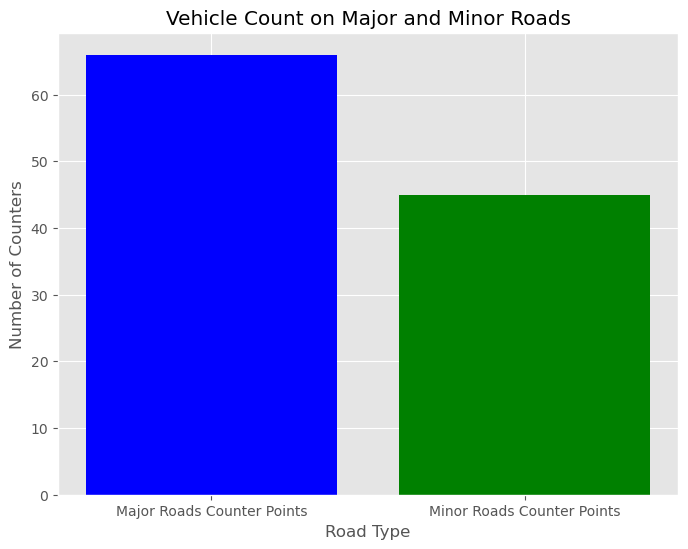

In [359]:
maj_counter=y=len(major_rd_df['count_point_id'].unique())
min_counter=len(minor_rd_df['count_point_id'].unique())
categories=['Major Roads Counter Points','Minor Roads Counter Points']
values=[maj_counter,min_counter]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Road Type')
plt.ylabel('Number of Counters')
plt.title('Vehicle Count on Major and Minor Roads')

# Show the plot
plt.show()


In [360]:
#df=df.merge(cp_df[['count_point_id','link_length_km']],on='count_point_id',suffixes=['_raw','_cp'])
#df

In [361]:
# df['link_length_km_raw'].fillna(df['link_length_km_cp'],inplace=True)
# df.drop(columns=['link_length_km_cp'])
# df.rename(columns={'link_length_km_raw':'link_length_km'},inplace=True)

In [362]:
df_grouped=pd.DataFrame(df.groupby(['count_point_id','year','month'])['hour'].unique()) # Varifying the hours
df_grouped['total_hours']=df_grouped['hour'].apply(len)
assert df_grouped[df_grouped['total_hours']!=12].shape[0]==0 # Assuring that no year/month has different hour range


In [363]:
df_grouped=pd.DataFrame(df.groupby(['count_point_id','year'])['month'].unique())
df_grouped['total_months']=df_grouped['month'].apply(len)
assert df_grouped[df_grouped['total_months']!=1].shape[0]==0 #Assuring that every year data was collected for one month only

In [364]:
df_grouped=pd.DataFrame(df.groupby(['count_point_id'])['year'].unique())
df_grouped['total_years']=df_grouped['year'].apply(len)
df_grouped['latest_year']=df_grouped['year'].apply(max)
df_grouped['oldest_year']=df_grouped['year'].apply(min)
df_grouped.reset_index(inplace=True)
df_grouped

,count_point_id,year,total_years,latest_year,oldest_year
0,6109,"[2002, 2011, 2016, 2021]",4,2021,2002
1,6111,"[2004, 2009, 2010, 2012, 2013, 2017, 2021]",7,2021,2004
2,6757,"[2007, 2011, 2017]",3,2017,2007
3,6774,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",12,2022,2000
4,7571,"[2002, 2012, 2020]",3,2020,2002
...,...,...,...,...,...
106,953192,"[2000, 2001, 2002, 2003, 2004, 2005, 2007, 200...",9,2009,2000
107,990355,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",10,2009,2000
108,998065,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",10,2009,2000
109,998071,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",9,2009,2000


In [365]:
excluded_counters=df_grouped[df_grouped['latest_year']<2013]['count_point_id'].unique()
excluded_counters

array([ 16257,  36928,  46804, 900006, 900017, 930376, 930377, 930378,
       942984, 942985, 942986, 942989, 942990, 942991, 942995, 942996,
       942998, 942999, 943004, 943005, 943008, 951768, 953192, 990355,
       998065, 998071, 998097], dtype=int64)

## Average Hourly Traffic

In [366]:
df.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles', 'geometry',
       'month'],
      dtype='object')

In [374]:
# Major Roads
df_grouped_major=pd.DataFrame(major_rd_df.groupby(['count_point_id','hour'])['all_motor_vehicles'].mean())
df_grouped_major.reset_index(inplace=True)
df_grouped_major['hour_category']=df_grouped_major['hour'].transform(lambda x: 'morning_peak' if x<9 else ('evening_peak' if x>15 else 'day_time'))
df_grouped_major=df_grouped_major.merge(cp_df[['count_point_id','latitude','longitude','link_length_km','capacity']],how='left',on='count_point_id')
df_grouped_major['vc']=df_grouped_major['all_motor_vehicles']/df_grouped_major['capacity'] # Calculating VC


# Minor Roads
df_grouped_minor=pd.DataFrame(minor_rd_df.groupby(['count_point_id','hour'])['all_motor_vehicles'].mean())
df_grouped_minor.reset_index(inplace=True)
df_grouped_minor['hour_category']=df_grouped_minor['hour'].transform(lambda x: 'morning_peak' if x<9 else ('evening_peak' if x>15 else 'day_time'))
df_grouped_minor=df_grouped_minor.merge(cp_df[['count_point_id','latitude','longitude','link_length_km','capacity']],how='left',on='count_point_id')
df_grouped_minor['vc']=df_grouped_minor['all_motor_vehicles']/df_grouped_minor['capacity'] # Calculating VC

df_grouped_major[df_grouped_major['vc']>=1]

,count_point_id,hour,all_motor_vehicles,hour_category,latitude,longitude,link_length_km,capacity,vc
240,17570,7,2116.250,morning_peak,51.458700,-0.194581,0.2,1500,1.410833
241,17570,8,2021.125,morning_peak,51.458700,-0.194581,0.2,1500,1.347417
242,17570,9,1802.375,day_time,51.458700,-0.194581,0.2,1500,1.201583
243,17570,10,1779.000,day_time,51.458700,-0.194581,0.2,1500,1.186000
244,17570,11,1706.875,day_time,51.458700,-0.194581,0.2,1500,1.137917
...,...,...,...,...,...,...,...,...,...
750,58233,13,1508.000,day_time,51.458366,-0.196264,0.3,1500,1.005333
752,58233,15,1576.800,day_time,51.458366,-0.196264,0.3,1500,1.051200
753,58233,16,1681.600,evening_peak,51.458366,-0.196264,0.3,1500,1.121067
754,58233,17,1821.000,evening_peak,51.458366,-0.196264,0.3,1500,1.214000


In [378]:
df_grouped_major[df_grouped_major['count_point_id']==17570]

,count_point_id,hour,all_motor_vehicles,hour_category,latitude,longitude,link_length_km,capacity,vc
240,17570,7,2116.250,morning_peak,51.4587,-0.194581,0.2,1500,1.410833
241,17570,8,2021.125,morning_peak,51.4587,-0.194581,0.2,1500,1.347417
242,17570,9,1802.375,day_time,51.4587,-0.194581,0.2,1500,1.201583
243,17570,10,1779.000,day_time,51.4587,-0.194581,0.2,1500,1.186000
244,17570,11,1706.875,day_time,51.4587,-0.194581,0.2,1500,1.137917
245,17570,12,1828.375,day_time,51.4587,-0.194581,0.2,1500,1.218917
246,17570,13,1702.625,day_time,51.4587,-0.194581,0.2,1500,1.135083
247,17570,14,1733.250,day_time,51.4587,-0.194581,0.2,1500,1.155500
248,17570,15,1927.125,day_time,51.4587,-0.194581,0.2,1500,1.284750
249,17570,16,2025.625,evening_peak,51.4587,-0.194581,0.2,1500,1.350417


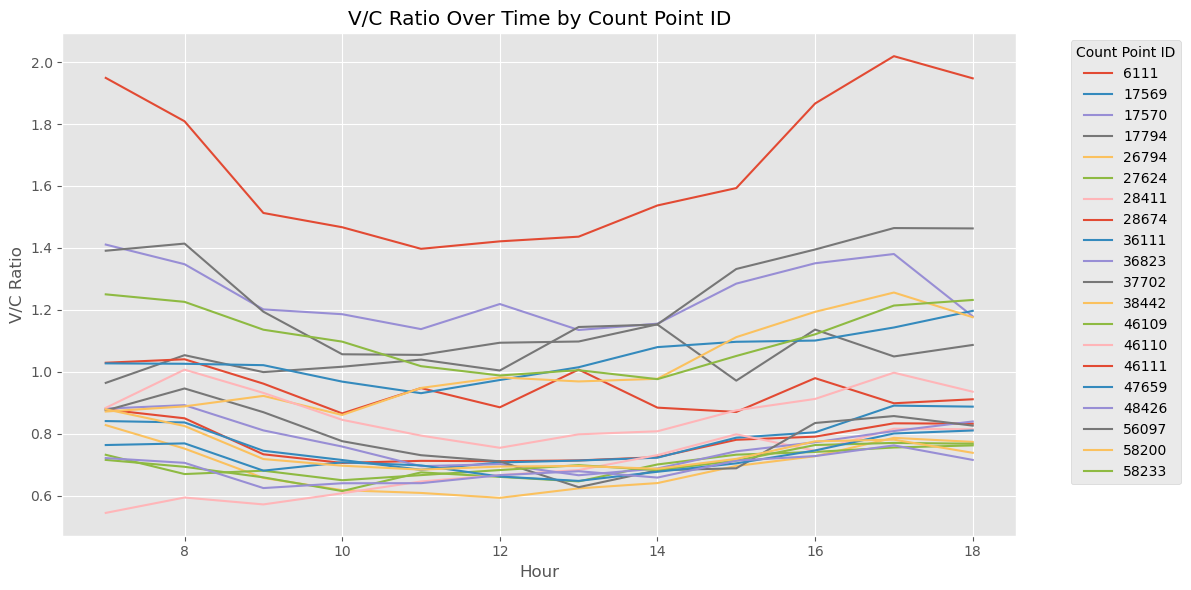

In [389]:

top_10_cps = df_grouped_major.groupby('count_point_id')['vc'].max().nlargest(20).index
df_top_10 = df_grouped_major[df_grouped_major['count_point_id'].isin(top_10_cps)]
plt.figure(figsize=(12, 6))

# Iterate over unique count_point_id and plot each subset
for cp in df_top_10['count_point_id'].unique():
    if cp not in excluded_counters:
        subset = df_top_10[df_top_10['count_point_id'] == cp]
        plt.plot(subset['hour'], subset['vc'], label=f'{cp}')

# Move the legend outside the plot
plt.legend(title="Count Point ID", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add axis labels and a title
plt.xlabel('Hour')
plt.ylabel('V/C Ratio')
plt.title('V/C Ratio Over Time by Count Point ID')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

## Showing the congestion points

In [400]:

df_maj_morning=df_grouped_major[df_grouped_major['hour_category']=='morning_peak'].copy()
df_maj_morning['density']=df_maj_morning['vc'].apply(lambda x: x*20 if x<=1 else x*20)

# Create a map centered at the average latitude and longitude
m = folium.Map(location=[df_maj_morning['latitude'].mean(), df_maj_morning['longitude'].mean()], zoom_start=12)

for _, row in df_maj_morning.iterrows():
    fill_color = 'red' if row['vc'] > 1 else 'green'
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['vc']*20,  # Adjust scaling (you can change it if circles are too big or small)
        color=None,  # No border
        fill=True,  # Enable fill
        fill_color=fill_color,  # Fill color
        fill_opacity=0.3  # Make the fill more transparent
    ).add_to(m)

    folium.Marker(
        location=(row['latitude'], row['longitude']),
        popup=f'ID: {row["count_point_id"]}\n Total Vehicles: {row["all_motor_vehicles"]}\nDensity: {row["vc"]}\nLink Length: {row["link_length_km"]}'
    ).add_to(m)

m

In [ ]:
major_rd_df[major_rd_df['link_length_km']<2][['count_point_id','link_length_km','year','hour','all_motor_vehicles']]

,count_point_id,link_length_km,year,hour,all_motor_vehicles
0,6109,0.6,2002,7,653
1,6109,0.6,2002,8,659
2,6109,0.6,2002,9,582
3,6109,0.6,2002,10,583
4,6109,0.6,2002,11,692
...,...,...,...,...,...
7771,94270,1.5,2022,11,604
7772,94270,1.5,2022,12,653
7773,94270,1.5,2022,13,692
7774,94270,1.5,2022,14,773


In [223]:
df_morning

,count_point_id,hour,all_motor_vehicles,hour_category,latitude,longitude
192,6109,9,538.0000,day_time,51.461221,-0.153137
193,6109,9,538.0000,day_time,51.461221,-0.153137
194,6109,9,538.0000,day_time,51.461221,-0.153137
195,6109,9,538.0000,day_time,51.461221,-0.153137
196,6109,9,538.0000,day_time,51.461221,-0.153137
...,...,...,...,...,...,...
158107,998097,15,55.9375,day_time,51.450833,-0.202202
158108,998097,15,55.9375,day_time,51.450833,-0.202202
158109,998097,15,55.9375,day_time,51.450833,-0.202202
158110,998097,15,55.9375,day_time,51.450833,-0.202202


In [224]:
df_morning['all_motor_vehicles'].unique()

array([ 538.        ,  534.125     ,  562.125     ,  547.875     ,
        573.        ,  575.875     ,  608.625     , 1100.64285714,
       1058.92857143, 1069.        , 1067.28571429, 1071.07142857,
       1086.71428571, 1171.        ,  523.66666667,  482.66666667,
        495.66666667,  477.83333333,  462.83333333,  451.        ,
        486.66666667,  635.54166667,  581.08333333,  588.125     ,
        597.58333333,  630.16666667,  651.125     ,  691.83333333,
        516.16666667,  481.16666667,  503.        ,  520.33333333,
        511.33333333,  517.        ,  548.33333333,  652.        ,
        599.625     ,  621.625     ,  570.        ,  603.875     ,
        643.125     ,  614.25      ,  289.5       ,  323.25      ,
        316.375     ,  342.625     ,  341.        ,  331.125     ,
        347.375     ,  592.        ,  637.25      ,  688.125     ,
        696.75      ,  681.375     ,  687.125     ,  650.25      ,
        979.16666667,  888.16666667,  849.16666667,  888.     

In [225]:
df_morning[df_morning['count_point_id']==6109]

,count_point_id,hour,all_motor_vehicles,hour_category,latitude,longitude
192,6109,9,538.000,day_time,51.461221,-0.153137
193,6109,9,538.000,day_time,51.461221,-0.153137
194,6109,9,538.000,day_time,51.461221,-0.153137
195,6109,9,538.000,day_time,51.461221,-0.153137
196,6109,9,538.000,day_time,51.461221,-0.153137
...,...,...,...,...,...,...
859,6109,15,608.625,day_time,51.461220,-0.153137
860,6109,15,608.625,day_time,51.461220,-0.153137
861,6109,15,608.625,day_time,51.461220,-0.153137
862,6109,15,608.625,day_time,51.461220,-0.153137


In [407]:
annaul_daily_df=pd.read_csv('data/avg_annual_daily.csv')[['count_point_id','year','road_name','road_type','all_motor_vehicles']]
annaul_daily_df

,count_point_id,year,road_name,road_type,all_motor_vehicles
0,6109,2000,A3,Major,26958
1,6109,2001,A3,Major,26777
2,6109,2002,A3,Major,25237
3,6109,2003,A3,Major,24916
4,6109,2004,A3,Major,23599
...,...,...,...,...,...
1941,998097,2005,C,Minor,1765
1942,998097,2006,C,Minor,1909
1943,998097,2007,C,Minor,1514
1944,998097,2008,C,Minor,1454


In [409]:
tdf=pd.DataFrame(annaul_daily_df.groupby(['count_point_id'])['year'].unique()).reset_index() # Groups by 'count_point_id' and lists unique years for each

# Calculating and adding columns to summarize year information for each count point:
tdf['total_years'] = tdf['year'].apply(len) # Counts the total number of unique years with data for each count point
tdf['min_year'] = tdf['year'].apply(min) # Finds the earliest (oldest) year with data availability
tdf['max_year'] = tdf['year'].apply(max) # Finds the latest (most recent) year with data availability
tdf=tdf.merge(annaul_daily_df[['count_point_id','road_name','road_type','all_motor_vehicles']],on='count_point_id', how='left')

tdf

,count_point_id,year,total_years,min_year,max_year,road_name,road_type,all_motor_vehicles
0,6109,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",24,2000,2023,A3,Major,26958
1,6109,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",24,2000,2023,A3,Major,26777
2,6109,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",24,2000,2023,A3,Major,25237
3,6109,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",24,2000,2023,A3,Major,24916
4,6109,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",24,2000,2023,A3,Major,23599
...,...,...,...,...,...,...,...,...
1941,998097,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",10,2000,2009,C,Minor,1765
1942,998097,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",10,2000,2009,C,Minor,1909
1943,998097,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",10,2000,2009,C,Minor,1514
1944,998097,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",10,2000,2009,C,Minor,1454


In [421]:
sensors=annaul_daily_df['count_point_id'].unique()
sensors=sensors[0:82]
sensors=[16257,  36928,  46804, 900006, 900017, 930376, 930377, 930378,
       942984, 942985, 942986, 942989, 942990, 942991, 942995, 942996,
       942998, 942999, 943004, 943005, 943008, 951768, 953192, 990355,
       998065, 998071, 998097]
len(sensors)

27

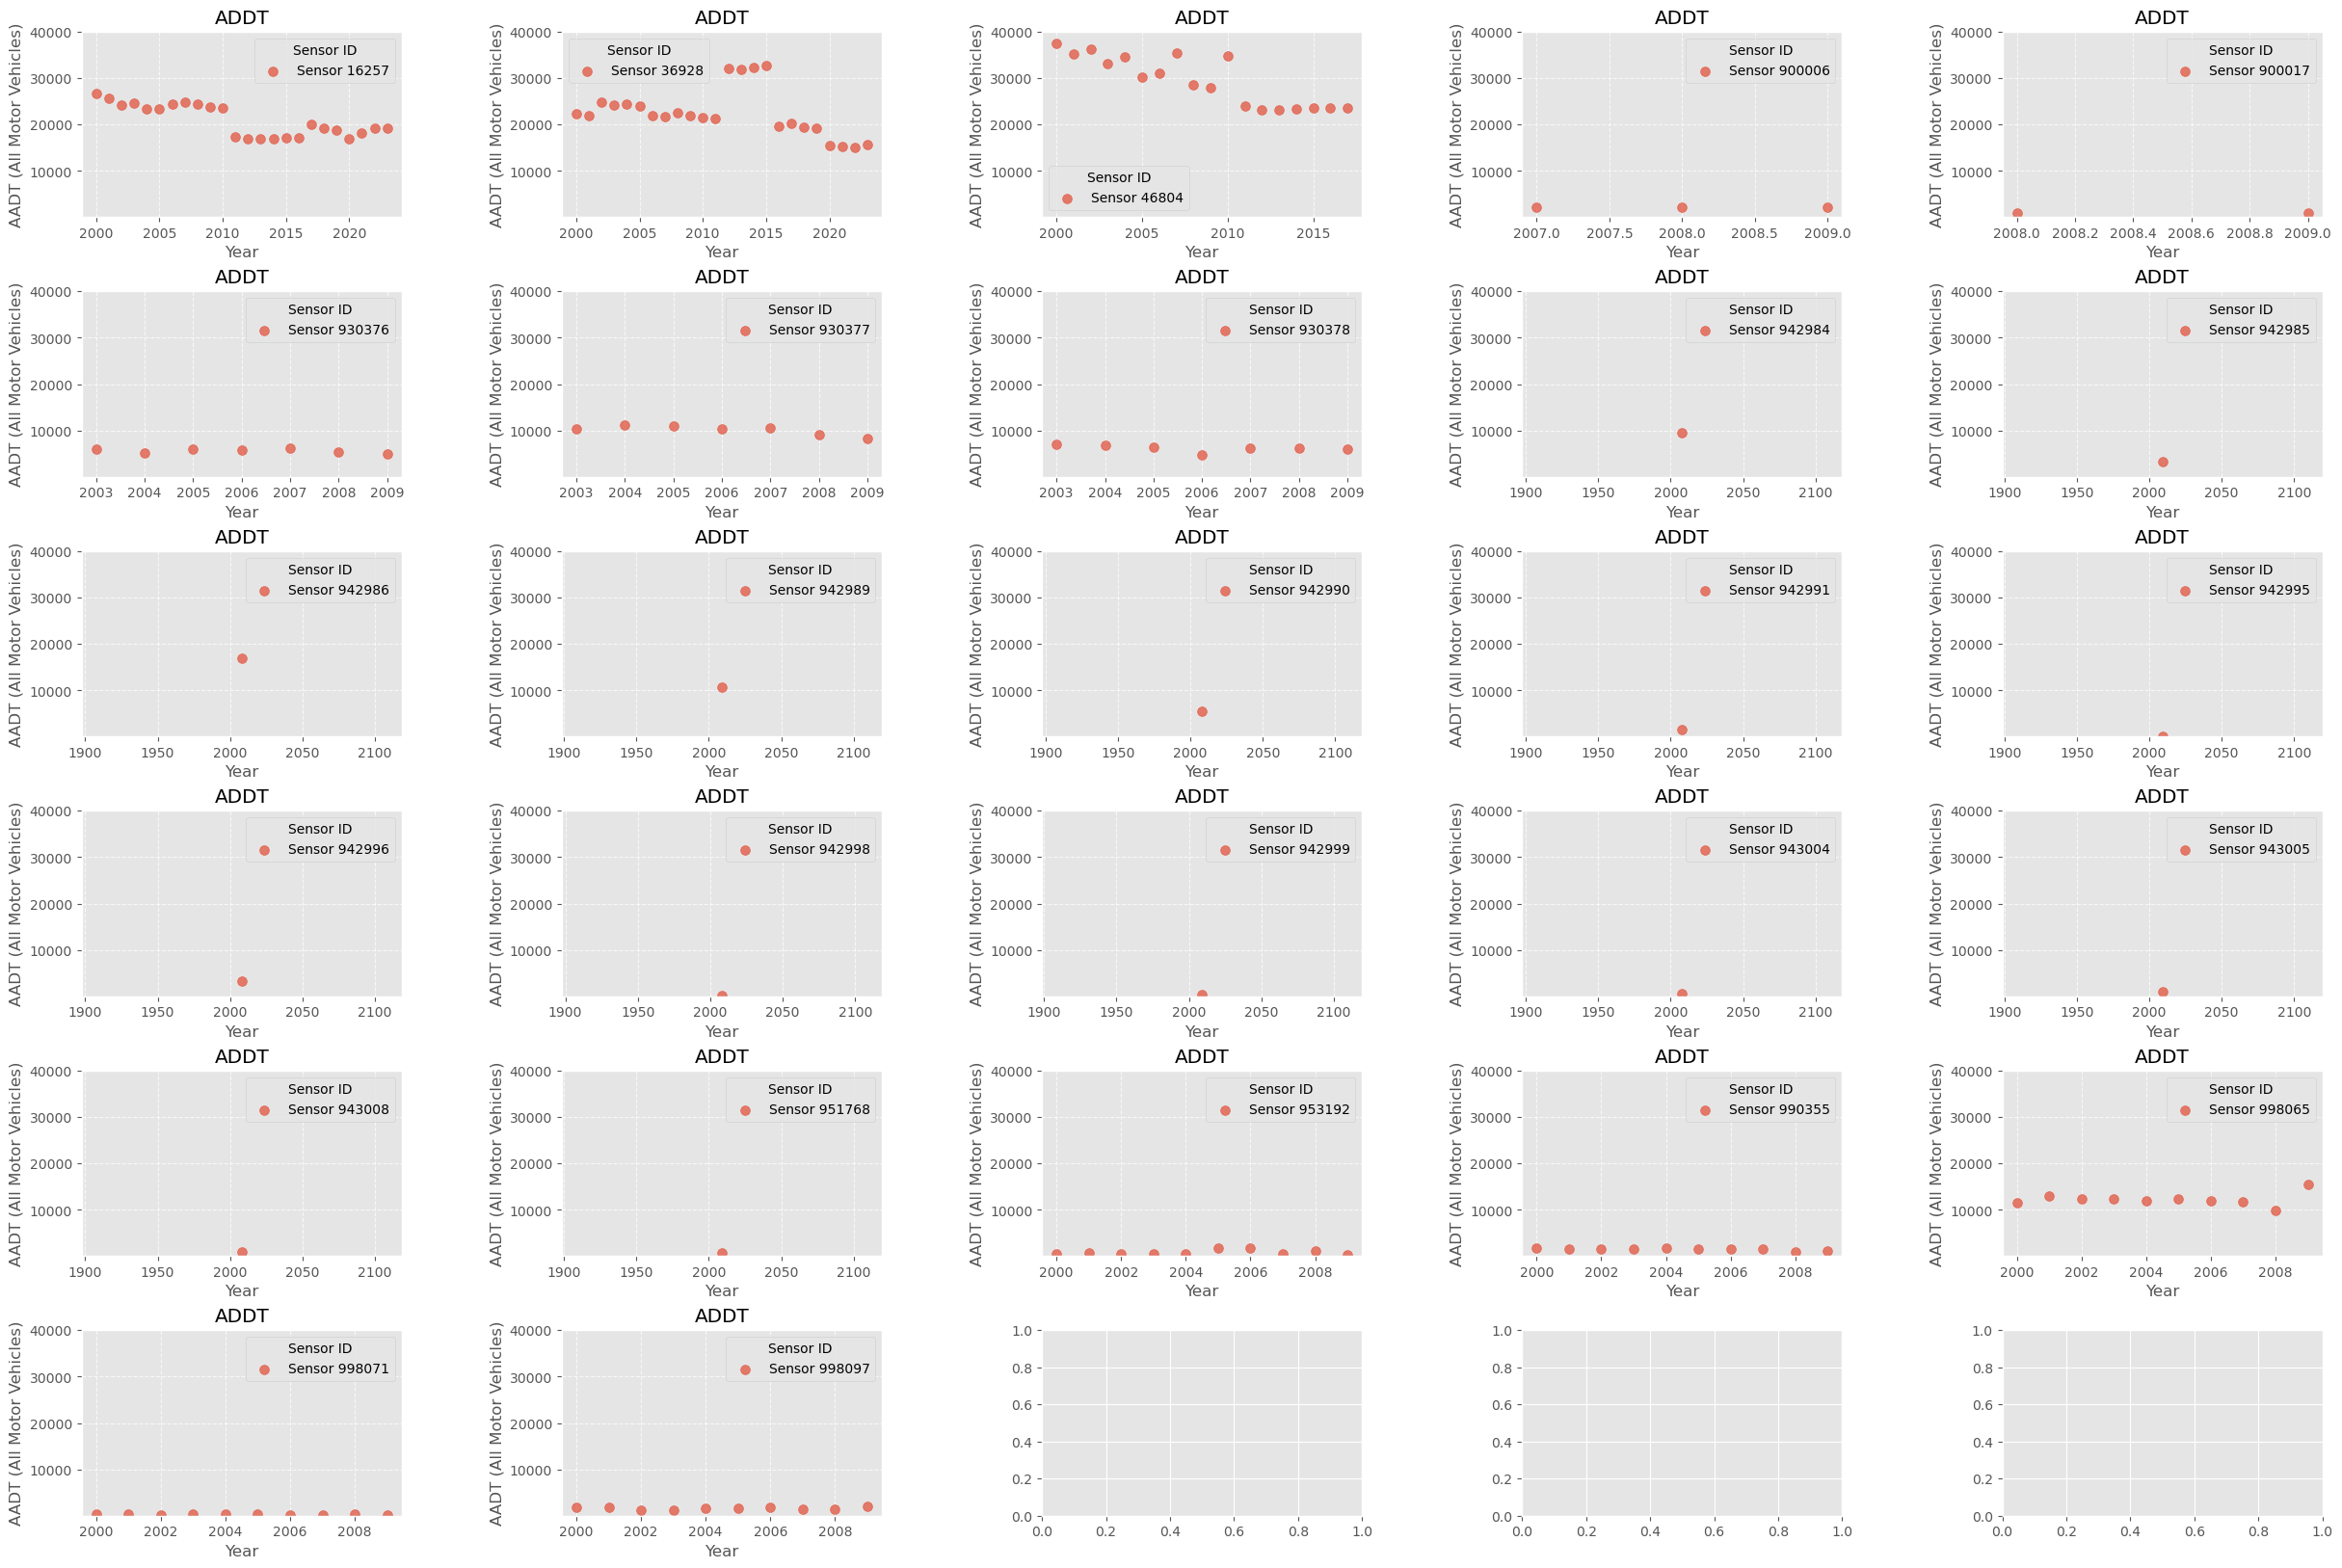

In [427]:
# Plotting a scatter plot of 'all_motor_vehicles' vs 'year' for each 'count_point_id'
add_lim= annaul_daily_df[annaul_daily_df['count_point_id'].isin(sensors)]

fig, ax = plt.subplots(6, 5, figsize=(30, 20))  # Create a 3x3 grid of subplots
plt.subplots_adjust(wspace=0.5,hspace=0.4)

ax = ax.flatten()
count=0
for sensor_id, sensor_data in add_lim.groupby('count_point_id'):
    ax[count].scatter(sensor_data['year'], sensor_data['all_motor_vehicles'], label=f"Sensor {sensor_id}", s=50, alpha=0.7)

    # Adding titles and labels
    ax[count].set_title("ADDT")
    ax[count].set_xlabel("Year")
    ax[count].set_ylabel("AADT (All Motor Vehicles)")
    ax[count].legend(title="Sensor ID")
    ax[count].grid(True, linestyle='--', alpha=0.7)
    ax[count].set_ylim([100, 40_000])
    
    count += 1

# Show plot
plt.show()